## Problem 1: Take at Home  (45 points)

### Introduction
Typically when we train a Convolutional Neural Network as an end-to-end image classifier, we input an image to the network, which gets propagated through the network (feed forward).

We then obtain our posterior probabilities at the end of the network.

However, there is no “rule” that says we must allow the image to forward propagate through the entire network that includes the head. Instead, we can:

1) Stop propagation at a layer before the head of the network (such as an activation or pooling layer).

2) Extract the logits at this layer.

3) Treat the values as a feature vector.

Now these feature vectors can be utilized in other downstream tasks like classification. Our aim is to create a system where an input query image will be responded by a number of  images that have strong resemblance to the query image. This particular task is called **similarity search**. A naive way to perform this task, would be to compare images based on pixel values, patches, or some other high level feature taken from the image itself. You are askd to use the ResNet-50 architecture to produce features that can represent a concept aka a face with specific characteristics. 

### Part 1 Loading of Dataset in Colab (5 points)

Create a jupyter notebook (eg on Google Colab) and download the LFW dataset, from [here](http://vis-www.cs.umass.edu/lfw/).

You can manually download the dataset using the above link and then upload to colab or altelnatively you can issue in colab the commands shown below


In [1]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz
!tar -xvf /content/lfw.tgz

tar: Error opening archive: Failed to open '/content/lfw.tgz'


In [3]:
!tar -xvf lfw.tgz

x lfw/
x lfw/George_HW_Bush/
x lfw/George_HW_Bush/George_HW_Bush_0001.jpg
x lfw/George_HW_Bush/George_HW_Bush_0002.jpg
x lfw/George_HW_Bush/George_HW_Bush_0003.jpg
x lfw/George_HW_Bush/George_HW_Bush_0004.jpg
x lfw/George_HW_Bush/George_HW_Bush_0005.jpg
x lfw/George_HW_Bush/George_HW_Bush_0006.jpg
x lfw/George_HW_Bush/George_HW_Bush_0007.jpg
x lfw/George_HW_Bush/George_HW_Bush_0008.jpg
x lfw/George_HW_Bush/George_HW_Bush_0009.jpg
x lfw/George_HW_Bush/George_HW_Bush_0010.jpg
x lfw/George_HW_Bush/George_HW_Bush_0011.jpg
x lfw/George_HW_Bush/George_HW_Bush_0012.jpg
x lfw/George_HW_Bush/George_HW_Bush_0013.jpg
x lfw/Curtis_Strange/
x lfw/Curtis_Strange/Curtis_Strange_0001.jpg
x lfw/Marc_Grossman/
x lfw/Marc_Grossman/Marc_Grossman_0001.jpg
x lfw/Marc_Grossman/Marc_Grossman_0002.jpg
x lfw/Marc_Grossman/Marc_Grossman_0003.jpg
x lfw/Marc_Grossman/Marc_Grossman_0004.jpg
x lfw/Michael_Schumacher/
x lfw/Michael_Schumacher/Michael_Schumacher_0001.jpg
x lfw/Michael_Schumacher/Michael_Schumacher_000

### Part 2 Using CNN for Feature Extraction (25 points)

Use ResNet50 to extract features vectors from raw images. You can use TF or Pytorch APIs to: 

* Obtain a ResNet-50  model pre-trained on a dataset such as ImageNet. 
* Perform necessary preprocessing on the images before feeding them into the network.
* Extract the features from the penultimate layer of the network (before the fully connected layer - the classification head).
* Store the features in a dictionary, where the key is the name of the image and the value is the feature vector.


In [1]:
import tensorflow as tf
import os
import numpy as np
from PIL import Image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')


# Define a function to preprocess the images before feeding them into the network
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # (224,224) is the resnet50 input size
    img = np.array(img)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    return img

# Define a function to extract features from an image using the pre-trained ResNet50 model
def extract_features(image_path,cnt):
    img = preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)
    features = model.predict(img)
    if cnt==50: print(features)
    features = np.squeeze(features)
    return features

features_dict = {}
c=0
# Loop over all subdirectories in the lfw directory
cnt=0
for person_name in os.listdir("lfw"):
    person_dir = os.path.join("lfw", person_name)
    for filename in os.listdir(person_dir):
        if filename.endswith(".jpg"):
            c=c+1
            image_path = os.path.join(person_dir, filename)
            features = extract_features(image_path,cnt)
            key = os.path.splitext(filename)[0]
            features_dict[key] = features
            cnt+=1


print(features_dict[list(features_dict.keys())[0]])

1/1 [==============================] - 0s 89ms/step
[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [1.7776421  0.         0.         ... 3.1687706  2.0269768
    0.        ]]

  [[0.         0.         0.         ... 1.8301313  0.
    0.        ]
   [0.         0.         0.         ... 4.604801   0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 4.2284775  4.671447
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.    

1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 0s 138ms/step


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 196ms/step


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 166ms/step


1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 201ms/step


1/1 [==============================] - 0s 175ms/step


1/1 [==============================] - 0s 204ms/step


1/1 [==============================] - 0s 205ms/step


1/1 [==============================] - 0s 187ms/step


1/1 [==============================] - 0s 187ms/step


1/1 [==============================] - 0s 195ms/step


1/1 [==============================] - 0s 195ms/step


1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 200ms/step


1/1 [==============================] - 0s 202ms/step


1/1 [==============================] - 0s 207ms/step


1/1 [==============================] - 0s 221ms/step


1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 220ms/step


1/1 [==============================] - 0s 263ms/step


1/1 [==============================] - 0s 214ms/step


1/1 [==============================] - 0s 225ms/step


1/1 [==============================] - 0s 244ms/step


1/1 [==============================] - 0s 249ms/step


1/1 [==============================] - 0s 246ms/step


1/1 [==============================] - 0s 240ms/step


1/1 [==============================] - 0s 247ms/step


1/1 [==============================] - 0s 263ms/step


1/1 [==============================] - 0s 289ms/step


1/1 [==============================] - 0s 266ms/step


1/1 [==============================] - 0s 278ms/step


1/1 [==============================] - 0s 290ms/step


1/1 [==============================] - 0s 297ms/step


1/1 [==============================] - 0s 275ms/step


1/1 [==============================] - 0s 333ms/step


1/1 [==============================] - 0s 292ms/step


1/1 [==============================] - 0s 316ms/step


1/1 [==============================] - 0s 299ms/step


1/1 [==============================] - 0s 306ms/step


1/1 [==============================] - 0s 324ms/step


1/1 [==============================] - 0s 347ms/step


1/1 [==============================] - 0s 312ms/step


1/1 [==============================] - 0s 328ms/step


1/1 [==============================] - 0s 340ms/step


1/1 [==============================] - 0s 367ms/step


1/1 [==============================] - 0s 377ms/step


1/1 [==============================] - 0s 382ms/step


1/1 [==============================] - 0s 383ms/step


1/1 [==============================] - 0s 388ms/step
[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0. 

In [3]:
'''import pickle

a = {'hello': 'world'}

with open('feature_dict_pickle.pickle', 'wb') as handle:
    pickle.dump(features_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('feature_dict_pickle.pickle', 'rb') as handle:
    b = pickle.load(handle)
    
print(b)'''

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Part 3 Retrieving most similar images (15 points)

Use a nearest neighbor algorithm such as [this](https://scikit-learn.org/stable/modules/neighbors.html) to obtain the 10 most similar images to 5 query images of your choice. Choose the results that best illustrate the effectiveness of your system. 


Query image: tim_henson.jpg


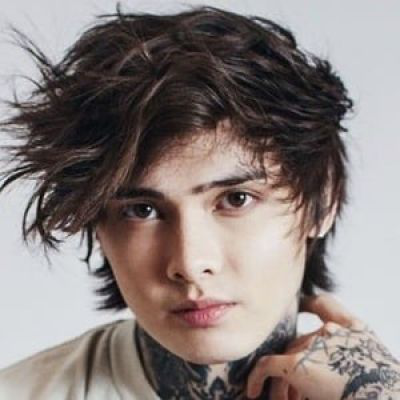

1/1 [==============================] - 0s 227ms/step
Similar image 1: Lisa_Ling_0001 (0.432)
lfw/Lisa_Ling/Lisa_Ling_0001.jpg


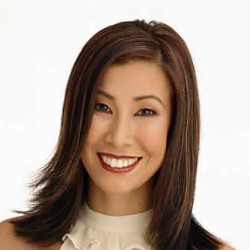


Query image: mathew_perry.jpg


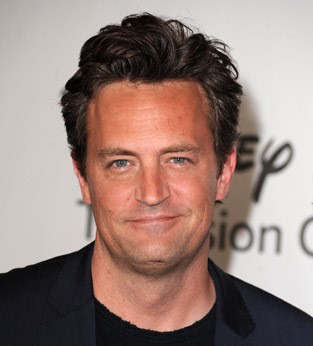

1/1 [==============================] - 0s 206ms/step
Similar image 1: Pierce_Brosnan_0011 (0.566)
lfw/Pierce_Brosnan/Pierce_Brosnan_0011.jpg


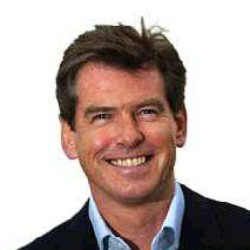


Query image: billie_eilish.jpg


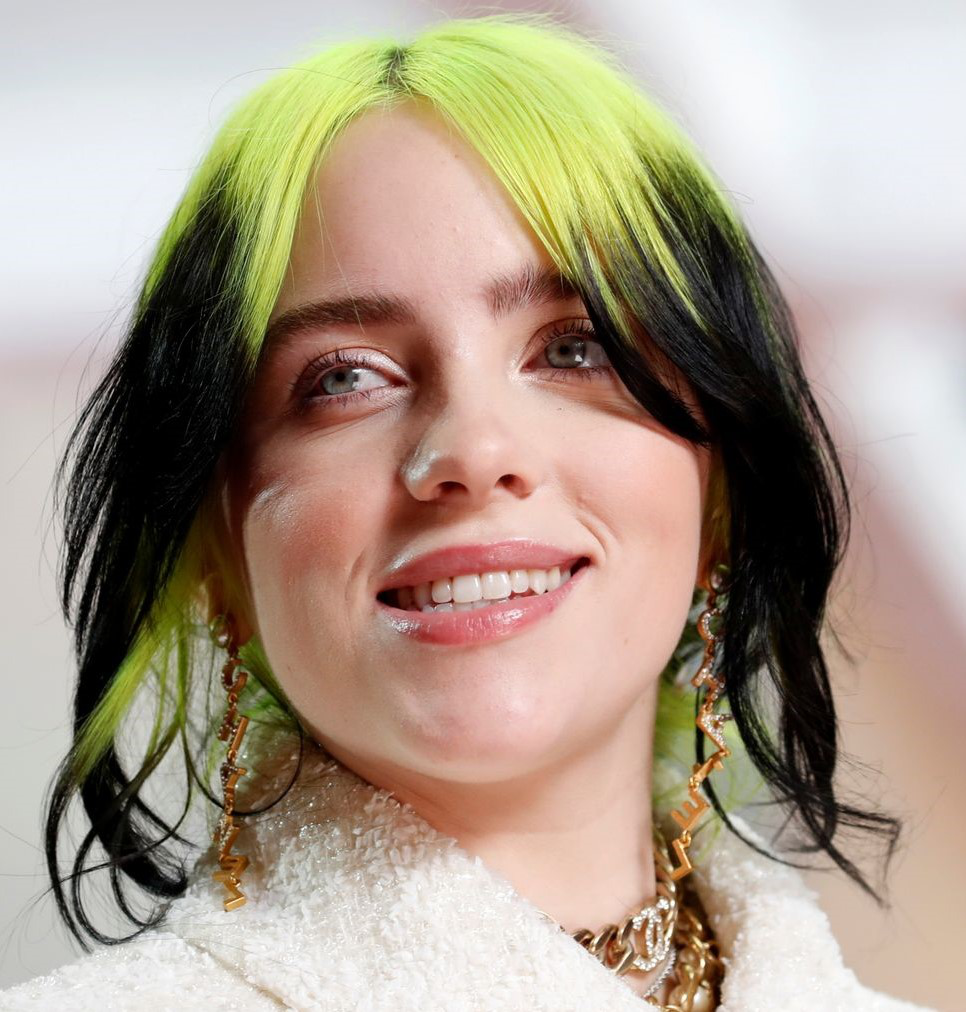

1/1 [==============================] - 0s 388ms/step
Similar image 1: Talisa_Bratt_0001 (0.381)
lfw/Talisa_Bratt/Talisa_Bratt_0001.jpg


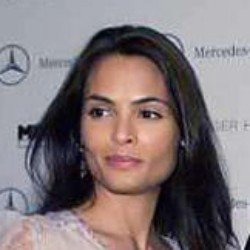


Query image: lebron_james.jpeg


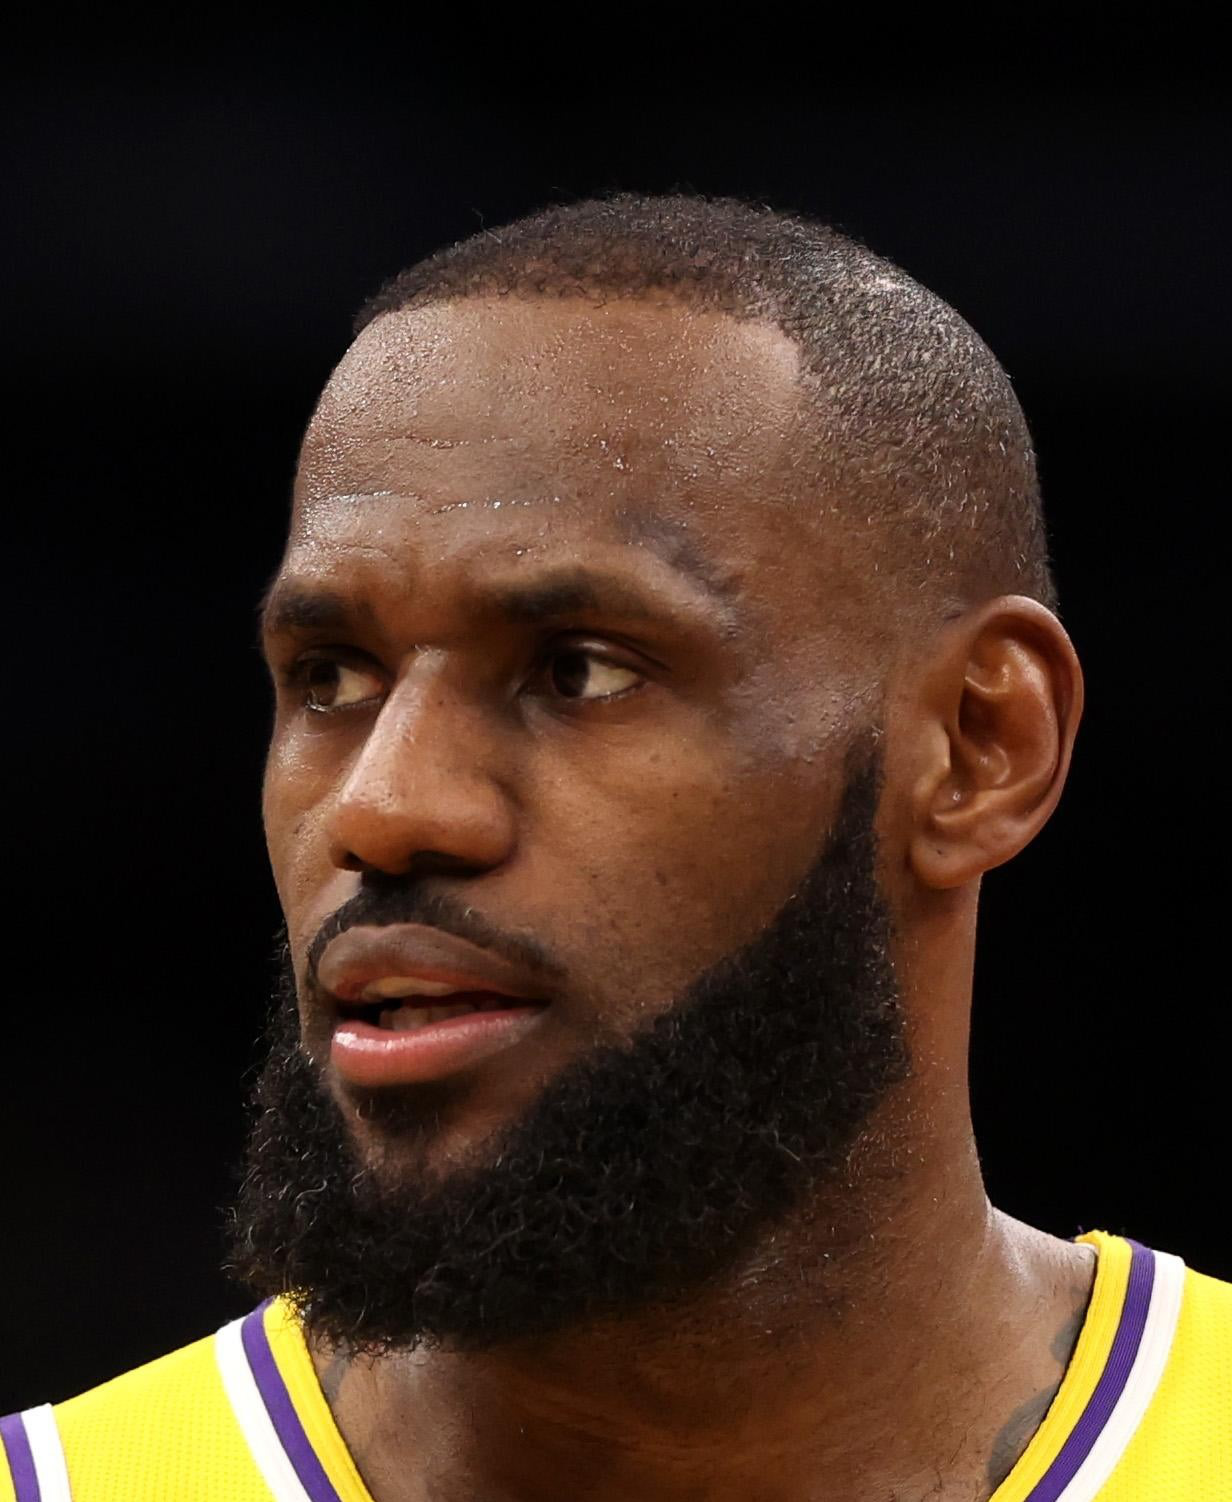

1/1 [==============================] - 0s 331ms/step
Similar image 1: Tracy_McGrady_0002 (0.452)
lfw/Tracy_McGrady/Tracy_McGrady_0002.jpg


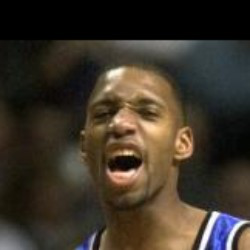


Query image: zhou_guanyu.jpg


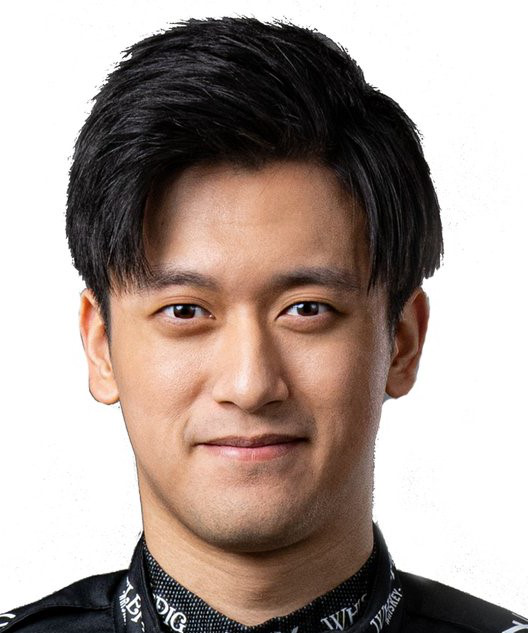

1/1 [==============================] - 0s 273ms/step
Similar image 1: Lee_Chang-dong_0001 (0.533)
lfw/Lee_Chang-dong/Lee_Chang-dong_0001.jpg


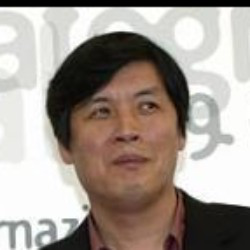

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Define a function to find the most similar images to a query image
def find_similar_images(query_image_name, num_results=1):

    query_features = extract_features(query_image_name)
    similarities = {}
    for image_name, features in features_dict.items():
        similarities[image_name] = cosine_similarity(query_features.reshape(1, -1), features.reshape(1, -1))[0][0]
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_similarities[:num_results]

# Define a list of query images to search for similar images

query_images = ["tim_henson.jpg","mathew_perry.jpg","billie_eilish.jpg","lebron_james.jpeg","zhou_guanyu.jpg"]

listOfImageNames = []
for query_image_name in query_images:
    print(f"Query image: {query_image_name}")
    pil_query_image_name = Image.open(query_image_name)
    display(pil_query_image_name)
    similar_images = find_similar_images(query_image_name)
    for i, (image_name, similarity) in enumerate(similar_images):
        print(f"Similar image {i+1}: {image_name} ({similarity:.3f})")
        similar_image_path = 'lfw/' + image_name[:-5] + '/' + image_name + '.jpg'
        print(similar_image_path)
        pil_similar_image_name = Image.open(similar_image_path)
        display(pil_similar_image_name)
        #display(img1(filename=similar_image_path))
    print()
